In [1]:
# Load libraries
import os 
import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
import missingno as msno

In [2]:
extension = 'csv'
path = r'C:\Users\Justin\Data Science\NJ Transit\data'
all_files = glob.glob(path + "/*.csv")

li = []

In [3]:
for file in all_files:
    df = pd.read_csv(file, index_col=None)
    li.append(df)
    
frame = pd.concat(li, axis=0, ignore_index=True)

In [26]:
frame.head(20)

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
0,2018-03-01,3805,1.0,New York Penn Station,105.0,New York Penn Station,105.0,2018-03-02 01:22:00,2018-03-02 01:21:05,0.000000,departed,Northeast Corrdr,NJ Transit
1,2018-03-01,3805,2.0,New York Penn Station,105.0,Secaucus Upper Lvl,38187.0,2018-03-02 01:31:00,2018-03-02 01:31:08,0.133333,departed,Northeast Corrdr,NJ Transit
2,2018-03-01,3805,3.0,Secaucus Upper Lvl,38187.0,Newark Penn Station,107.0,2018-03-02 01:40:00,2018-03-02 01:40:07,0.116667,departed,Northeast Corrdr,NJ Transit
3,2018-03-01,3805,4.0,Newark Penn Station,107.0,Newark Airport,37953.0,2018-03-02 01:45:00,2018-03-02 01:45:10,0.166667,departed,Northeast Corrdr,NJ Transit
4,2018-03-01,3805,5.0,Newark Airport,37953.0,North Elizabeth,109.0,2018-03-02 01:49:00,2018-03-02 01:49:10,0.166667,departed,Northeast Corrdr,NJ Transit
5,2018-03-01,3805,6.0,North Elizabeth,109.0,Elizabeth,41.0,2018-03-02 01:52:00,2018-03-02 01:52:01,0.016667,departed,Northeast Corrdr,NJ Transit
6,2018-03-01,3805,7.0,Elizabeth,41.0,Linden,70.0,2018-03-02 01:58:00,2018-03-02 01:58:05,0.083333,departed,Northeast Corrdr,NJ Transit
7,2018-03-01,3805,8.0,Linden,70.0,Rahway,127.0,2018-03-02 02:02:00,2018-03-02 02:01:03,0.000000,departed,Northeast Corrdr,NJ Transit
8,2018-03-01,3805,9.0,Rahway,127.0,Metropark,83.0,2018-03-02 02:08:00,2018-03-02 02:08:00,0.000000,departed,Northeast Corrdr,NJ Transit
9,2018-03-01,3805,10.0,Metropark,83.0,Metuchen,84.0,2018-03-02 02:13:00,2018-03-02 02:13:10,0.166667,departed,Northeast Corrdr,NJ Transit


In [5]:
frame.tail()

,date,train_id,stop_sequence,from,from_id,to,to_id,scheduled_time,actual_time,delay_minutes,status,line,type
3428997,2019-04-30,1629,5.0,Nanuet,100.0,Spring Valley,142.0,2019-04-30 18:25:00,2019-04-30 18:27:00,2.0,estimated,Pascack Valley,NJ Transit
3428998,2019-04-30,A2124,NaN,Philadelphia,1.0,Philadelphia,1.0,NaN,2019-04-30 19:28:49,NaN,departed,ACELA EXPRESS,Amtrak
3428999,2019-04-30,A2124,NaN,Philadelphia,1.0,Metropark,83.0,NaN,2019-04-30 20:16:23,NaN,departed,ACELA EXPRESS,Amtrak
3429000,2019-04-30,A2124,NaN,Metropark,83.0,Newark Penn Station,107.0,NaN,2019-04-30 20:30:53,NaN,departed,ACELA EXPRESS,Amtrak
3429001,2019-04-30,A2124,NaN,Newark Penn Station,107.0,New York Penn Station,105.0,NaN,2019-04-30 20:49:04,NaN,departed,ACELA EXPRESS,Amtrak


In [6]:
frame.describe()

,stop_sequence,from_id,to_id,delay_minutes
count,3.150284e+06,3.428111e+06,3.428111e+06,3.150284e+06
mean,8.081979e+00,4.191632e+03,4.203952e+03,4.058194e+00
std,5.087855e+00,1.174142e+04,1.175508e+04,6.212329e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,4.000000e+00,5.900000e+01,5.900000e+01,1.066667e+00
50%,7.000000e+00,1.050000e+02,1.050000e+02,2.300000e+00
75%,1.200000e+01,1.360000e+02,1.360000e+02,5.066667e+00
max,2.600000e+01,4.359900e+04,4.359900e+04,3.260000e+02


In [7]:
frame.shape

(3429002, 13)

In [8]:
numeric_features = frame.select_dtypes(include=[np.number])
numeric_features.columns

Index(['stop_sequence', 'from_id', 'to_id', 'delay_minutes'], dtype='object')

In [9]:
categorical_features = frame.select_dtypes(include=[np.object])
categorical_features.columns

Index(['date', 'train_id', 'from', 'to', 'scheduled_time', 'actual_time',
       'status', 'line', 'type'],
      dtype='object')

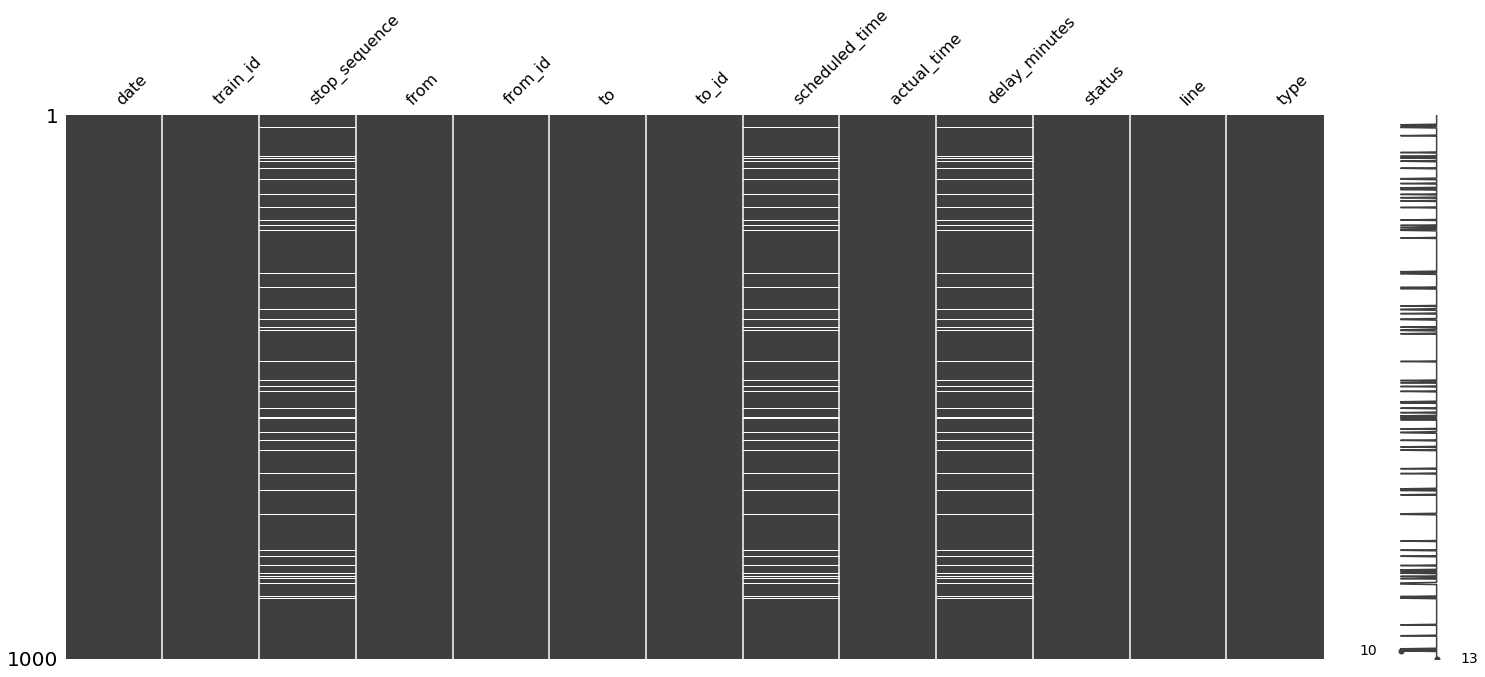

In [10]:
msno.matrix(frame.sample(1000))

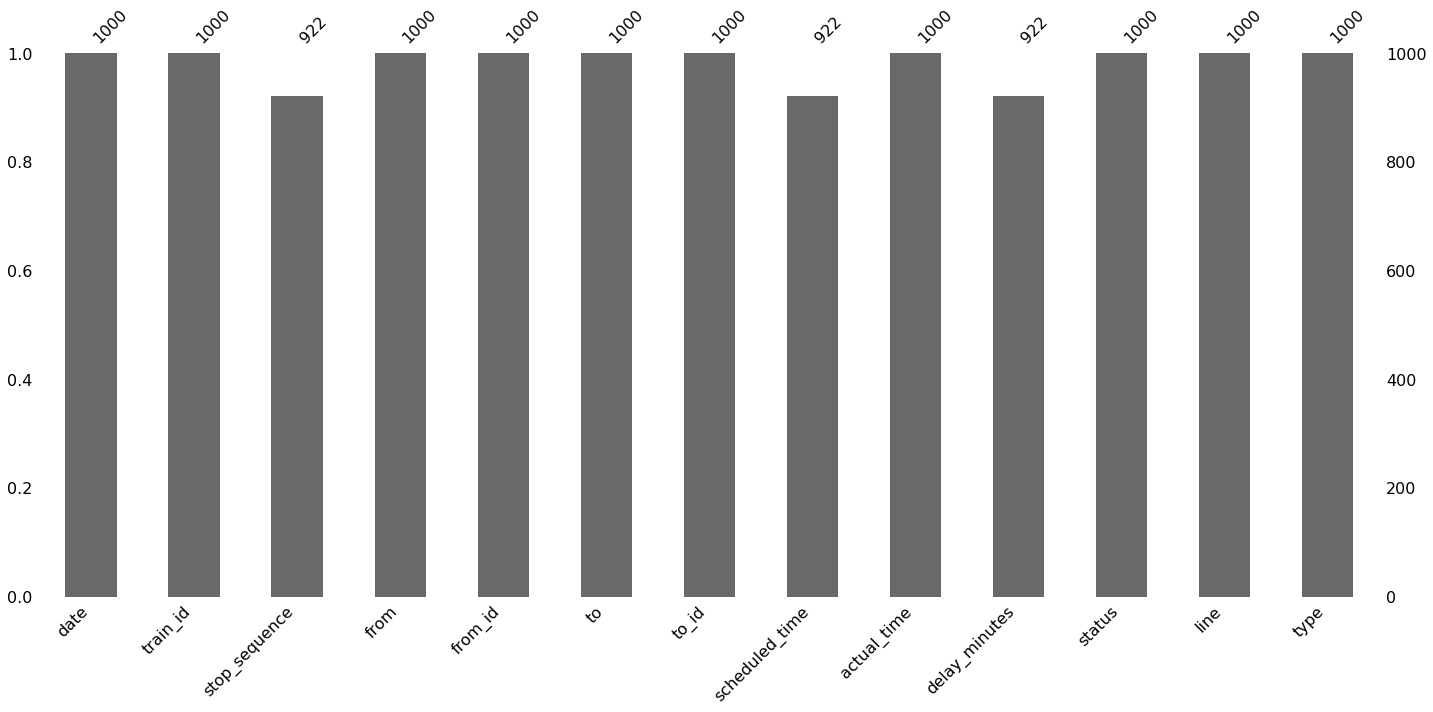

In [11]:
msno.bar(frame.sample(1000))

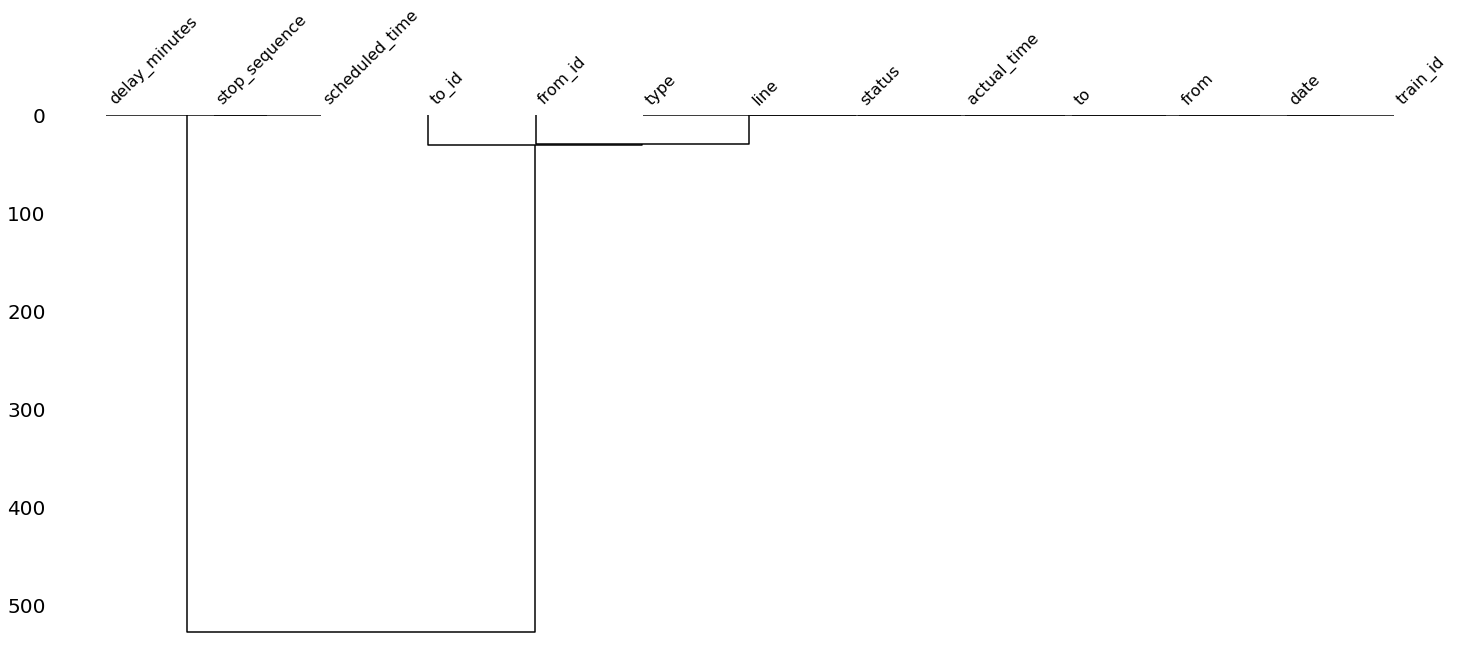

In [12]:
msno.dendrogram(frame)

In [13]:
frame.skew()

stop_sequence    0.602842
from_id          2.523344
to_id            2.517520
delay_minutes    5.797532
dtype: float64

In [14]:
frame.kurt()

stop_sequence    -0.169474
from_id           4.406279
to_id             4.377140
delay_minutes    65.492690
dtype: float64

In [15]:
# Remove rows where we have no delay_minutes value
frame = frame.dropna(subset=['delay_minutes'])

C:\Users\Justin\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


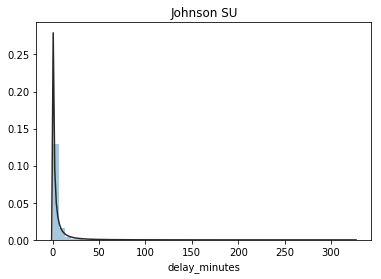

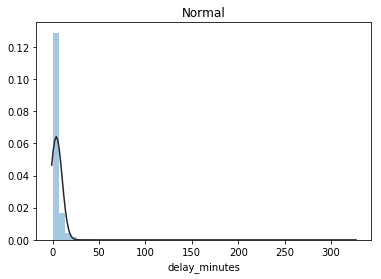

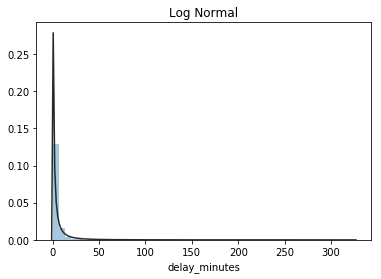

In [17]:
y = frame['delay_minutes']

plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)

plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)

plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

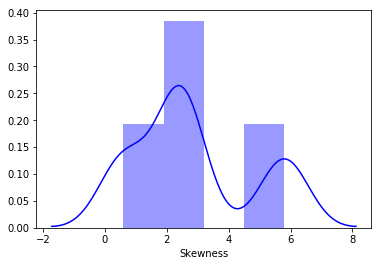

In [18]:
sns.distplot(frame.skew(), color='blue', axlabel='Skewness')

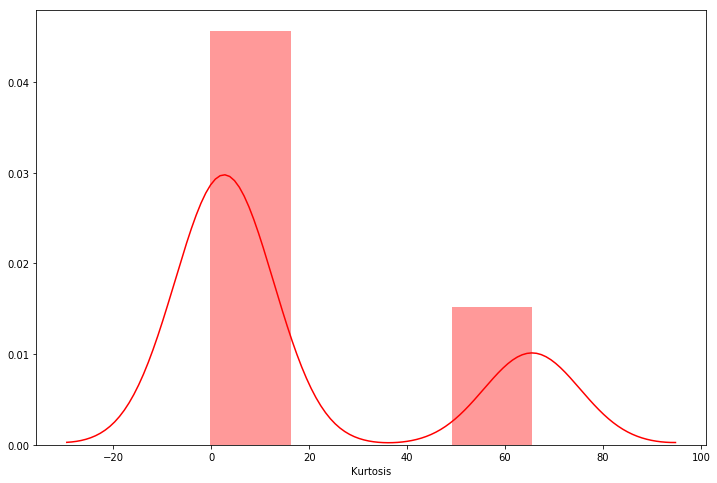

In [20]:
plt.figure(figsize = (12,8))
sns.distplot(frame.kurt(), color='r', axlabel='Kurtosis', norm_hist=False, kde=True, rug=False)
plt.show()

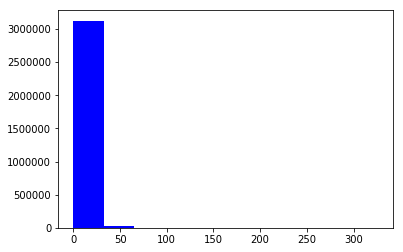

In [23]:
plt.hist(frame['delay_minutes'], orientation='vertical', histtype='bar', color='blue')
plt.show()

In [33]:
correlation = numeric_features.corr()
print(correlation['delay_minutes'].sort_values(ascending=False), '\n')

delay_minutes    1.000000
stop_sequence    0.083680
to_id            0.012695
from_id         -0.009690
Name: delay_minutes, dtype: float64 



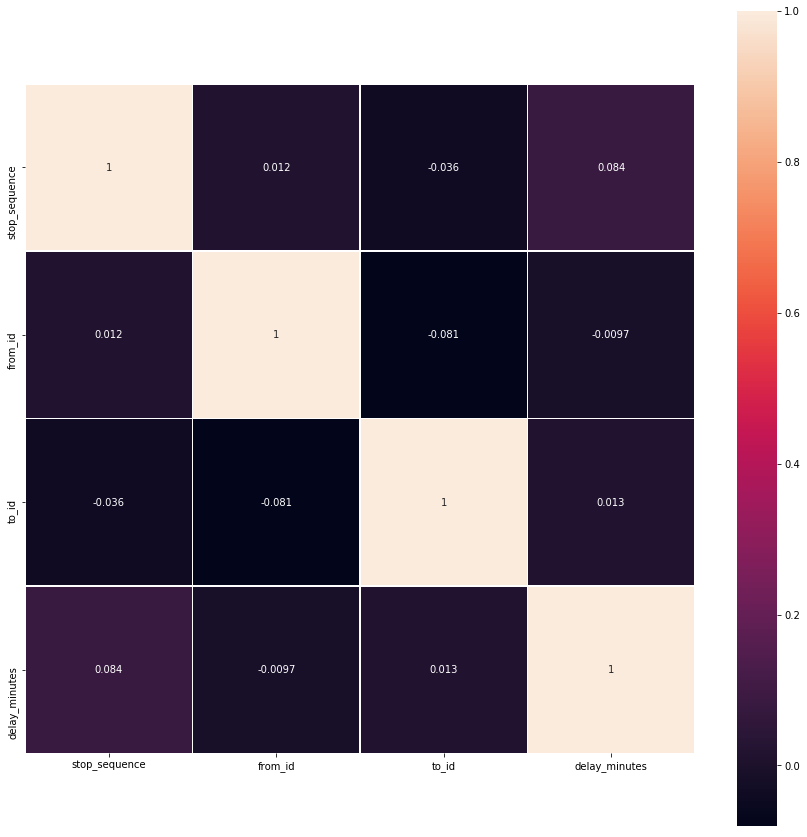

In [34]:
f, ax = plt.subplots(figsize = (15, 15))
sns.heatmap(correlation, square=True, linewidths=0.5, annot=True)
plt.show()

C:\Users\Justin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Justin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Justin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


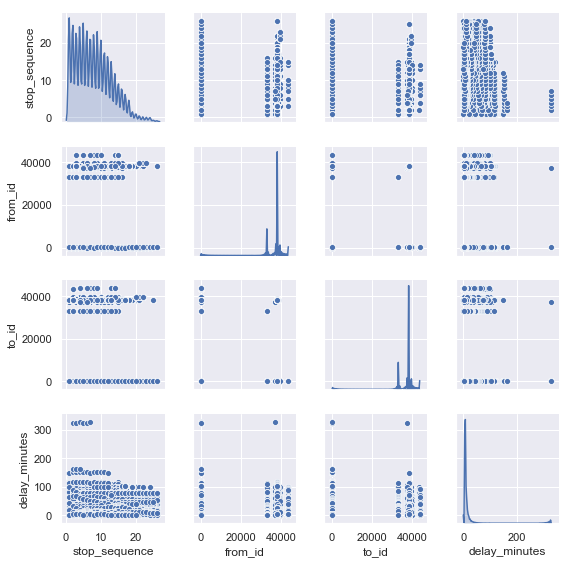

In [37]:
sns.set()
columns = ['delay_minutes', 'stop_sequence', 'to_id', 'from_id']
sns.pairplot(frame[numeric_features.columns], size=2, kind='scatter', diag_kind='kde')
plt.show()

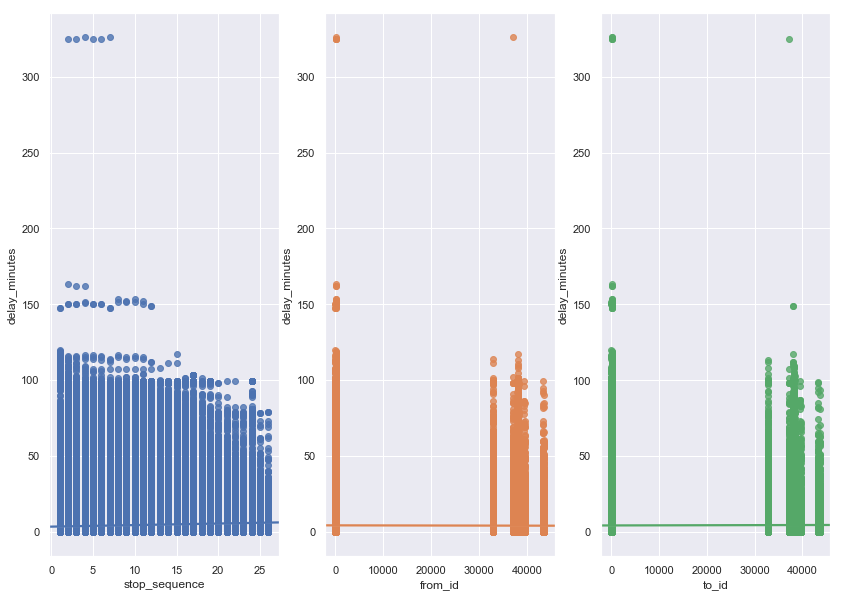

In [42]:
fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, figsize=(14,10))

stop_sequence_scatter = pd.concat([frame['delay_minutes'], frame['stop_sequence']], axis=1)
sns.regplot(x='stop_sequence', y='delay_minutes', data=stop_sequence_scatter, scatter=True, fit_reg=True, ax=ax1)

from_id_scatter = pd.concat([frame['delay_minutes'], frame['from_id']], axis=1)
sns.regplot(x='from_id', y='delay_minutes', data=from_id_scatter, scatter=True, fit_reg=True, ax=ax2)

to_id_scatter = pd.concat([frame['delay_minutes'], frame['to_id']], axis=1)
sns.regplot(x='to_id', y='delay_minutes', data=to_id_scatter, scatter=True, fit_reg=True, ax=ax3)

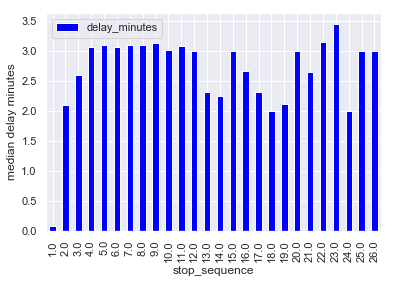

In [44]:
delay_minutes_stop_sequence = frame.pivot_table(index='stop_sequence', values='delay_minutes', aggfunc=np.median)
delay_minutes_stop_sequence.plot(kind='bar', color='blue')
plt.xlabel('stop_sequence')
plt.ylabel('median delay minutes')
plt.show()

(-0.5, 25.5, 0, 150)

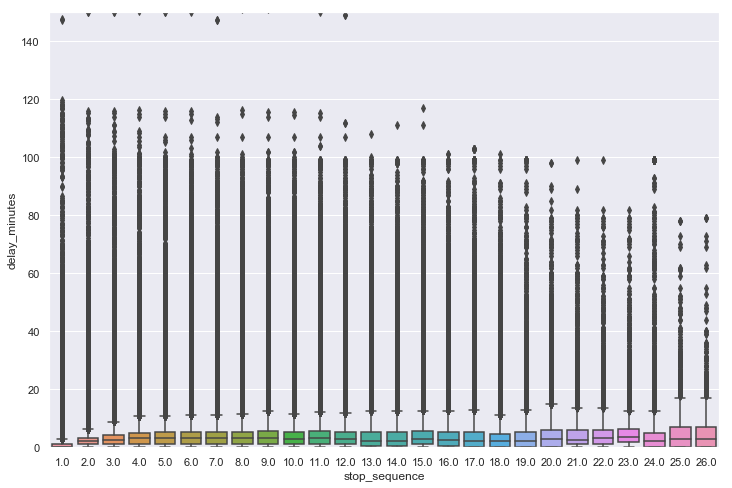

In [51]:
var = 'stop_sequence'
data = pd.concat([frame['delay_minutes'], frame[var]], axis=1)
f, ax = plt.subplots(figsize=(12,8))
fig = sns.boxplot(x=var, y='delay_minutes', data=data)
fig.axis(ymin=0, ymax=150)